# Problem Set 6, Part Two: Due Tuesday, March 18 by 8am Eastern Daylight Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### ROC Curves for Tests of Equal Variances

Suppose we have independent samples $\{x_i|i=1,\ldots,n\}$ and $\{y_j|j=1,\ldots,m\}$ drawn from continuous distributions (so there will be no ties in the rankings).  We wish to compare four test statistics for equal variance/spread, all derived from the absolute deviations from the sample means, $U_i=|x_i-\overline{x}|$ and $V_j=|y_j-\overline{y}|$:

1. The Conover squared-ranks test, which uses as its test statistic $T_x^c=\sum_{i=1}^n [R(U_i)]^2$ or equivalently $T_y^c=\sum_{j=1}^m [R(V_j)]^2=\frac{N(N+1)(2N+1)}{6}-T_x^c$, where $N=n+m$.
2. The Wilcoxon rank-sum test applied to the $\{U_i\}$ and $\{V_j\}$, which uses as its test statistic $T_x^w=\sum_{i=1}^n R(U_i)$ or equivalently $T_y^w=\sum_{j=1}^m R(V_j)=\frac{N(N+1)}{2}-T_x^w$.
3. The $F$-test, which uses as its test statistic the ratio of the sample variances $F=\frac{s_x^2}{s_y^2} = \frac{m-1}{n-1}\frac{T_x^f}{T_y^f}$, where $T_x^f=\sum_{i=1}^n (U_i)^2$ and $T_y^f=\sum_{j=1}^m (V_j)^2$.
4. A test which uses as its test statistic $T_x^a/T_y^a$ where $T_x^a=\sum_{i=1}^n U_i$ and $T_y^a=\sum_{j=1}^m V_j$.  Note that $T_x^a/n=\frac{1}{n}\sum_{i=1}^n|x_i-\overline{x}|$ and $T_y^a/m=\frac{1}{m}\sum_{j=1}^m|y_j-\overline{y}|$ are the mean absolute deviations (from their respective means) of the two samples.

So as not to have to worry about the null distributions of each of these statistics, we'll compare the powers using an ROC curve, in which the signficance $\alpha$ and power $\gamma$ are both estimated empirically.  There is one complication, though.  If we want to conduct a two-tailed test, in which the alternative is simply that the spreads of the two populations are different, we would need to set two thresholds on a statistic like $T_x/T_y$.  The connection between the upper and lower threshold is complicated by two factors:

1. Since the statistic is positive definite, the lower threshold is calculated using a tail extending to zero, while the upper one has a tail to infinity.  E.g., if $T_x$ is at least four times $T_y$, then $T_x/T_y\ge 4$, while if $T_y$ is at least four times $T_x$, then $T_x/T_y\le 0.25$.  This is easily addressed by using the logarithm of the test statistic, $\ln(T_x/T_y)=\ln T_x - \ln T_y$.  If $T_x$ and $T_y$ have the same null distribution, we can set a threshold $c$ and reject the null hypothesis if $|\ln(T_x/T_y)|\ge c$.
2. If the sample sizes $n$ and $m$ are different, $T_x$ and $T_y$ will not have the same null distribution.  So we'll choose the same sample size below, $n=m=45$.

**(a)** Normal Sampling Distribution

We perform a Monte Carlo using normal distributions $N(\mu_x,\sigma_x^2)$ and $N(\mu_y,\sigma_y^2)$.  For $H_0$, we take $\sigma_y=\sigma_x$ and for $H_1$ we take $\sigma_y=1.4\sigma_x$.  The means should be irrelevant, so we take $\mu_x=5$ and $\mu_y=0$.  We let $\sigma_x=1$ for simplicity.  We don't actually need to take two sets of samples; we'll generate the data for  the first sample as $x_i^{(I)}$ and $y_j^{(I)}$ where $i=1,\ldots,n$, $j=1,\ldots,m$, $I=1,\ldots,N_{\rm monte}$, $n=m=45$, and $N_{\rm monte}=10^4$.  If $\{y_j^{(I)}\}$ is a sample from $N(0,1)$, then $\{1.4 y_j^{(I)}\}$ is a sample from $N(0,[1.4]^2)$.  (This would have been more complicated if we hadn't taken $\mu_y=0$.)

In [3]:
Nmonte = 10**4
n = 45
m = 45
N = m+n
np.random.seed(20250304)
x_Ii = stats.norm(loc=5).rvs(size=(Nmonte,n))
y0_Ij = stats.norm.rvs(size=(Nmonte,m))
y1_Ij = y0_Ij * 1.4
xbar_I = np.mean(x_Ii,axis=-1)
ybar0_I = np.mean(y0_Ij,axis=-1)
ybar1_I = np.mean(y1_Ij,axis=-1)

Now we calculate $U^{(I)}_i=|x^{(I)}_i-\overline{x}^{(I)}|$, $V^{(I)}_j=|y^{(I)}_j-\overline{y}^{(I)}|$, and their ranks for the null and alternative samples.  Note that $U^{(I)}_i$ is the same in both samples (because the $\{x^{(I)}_i\}$ are all the same) but the ranks are not, because they depend on the values of the $\{V^{(I)}_j\}$.

In [4]:
U_Ii = np.abs(x_Ii - xbar_I[:,None])
V0_Ij = np.abs(y0_Ij - ybar0_I[:,None])
V1_Ij = np.abs(y1_Ij - ybar1_I[:,None])
UVcombo0_Ik = np.concatenate((U_Ii,V0_Ij),axis=-1)
UVcombo1_Ik = np.concatenate((U_Ii,V1_Ij),axis=-1)
xflags_k = np.concatenate(([True,]*n,[False,]*m))
yflags_k = np.bitwise_not(xflags_k)
UVranks0_Ik = stats.mstats.rankdata(UVcombo0_Ik,axis=-1)
UVranks1_Ik = stats.mstats.rankdata(UVcombo1_Ik,axis=-1)
Uranks0_Ik = UVranks0_Ik*xflags_k[None,:]
Uranks1_Ik = UVranks1_Ik*xflags_k[None,:]
Vranks0_Ik = UVranks0_Ik*yflags_k[None,:]
Vranks1_Ik = UVranks1_Ik*yflags_k[None,:]

We construct the $T_x$ and $T_y$ for each of the four tests, for the null and alternative samples.  (Note that $T_x^f$ and $T_x^a$ are constructed only from the $\{x_i\}$, so they're the same in the null and alternative samples.)

In [5]:
Txc0_I = np.sum(Uranks0_Ik**2,axis=-1)
Txc1_I = np.sum(Uranks1_Ik**2,axis=-1)
Tyc0_I = np.sum(Vranks0_Ik**2,axis=-1)
Tyc1_I = np.sum(Vranks1_Ik**2,axis=-1)
Txw0_I = np.sum(Uranks0_Ik,axis=-1)
Txw1_I = np.sum(Uranks1_Ik,axis=-1)
Tyw0_I = np.sum(Vranks0_Ik,axis=-1)
Tyw1_I = np.sum(Vranks1_Ik,axis=-1)
Txf_I = np.sum(U_Ii**2,axis=-1)
Tyf0_I = np.sum(V0_Ij**2,axis=-1)
Tyf1_I = np.sum(V1_Ij**2,axis=-1)
Txa_I = np.sum(U_Ii,axis=-1)
Tya0_I = np.sum(V0_Ij,axis=-1)
Tya1_I = np.sum(V1_Ij,axis=-1)

Now we construct the search statistics $T=|\ln(T_x/T_y)|$ in each case, set thresholds on them, and calculate the significance and power as a function of the threshold $c$.

In [6]:
Tc0_I = np.abs(np.log(Txc0_I/Tyc0_I))
Tc1_I = np.abs(np.log(Txc1_I/Tyc1_I))
cc_c = np.linspace(0,np.max(Tc0_I),1000)
alphac_c = np.mean((Tc0_I[None,:] > cc_c[:,None]),axis=-1)
gammac_c = np.mean((Tc1_I[None,:] > cc_c[:,None]),axis=-1)
Tw0_I = np.abs(np.log(Txw0_I/Tyw0_I))
Tw1_I = np.abs(np.log(Txw1_I/Tyw1_I))
cw_c = np.linspace(0,np.max(Tw0_I),1000)
alphaw_c = np.mean((Tw0_I[None,:] > cw_c[:,None]),axis=-1)
gammaw_c = np.mean((Tw1_I[None,:] > cw_c[:,None]),axis=-1)
Tf0_I = np.abs(np.log(Txf_I/Tyf0_I))
Tf1_I = np.abs(np.log(Txf_I/Tyf1_I))
cf_c = np.linspace(0,np.max(Tf0_I),1000)
alphaf_c = np.mean((Tf0_I[None,:] > cf_c[:,None]),axis=-1)
gammaf_c = np.mean((Tf1_I[None,:] > cf_c[:,None]),axis=-1)
Ta0_I = np.abs(np.log(Txa_I/Tya0_I))
Ta1_I = np.abs(np.log(Txa_I/Tya1_I))
ca_c = np.linspace(0,np.max(Ta0_I),1000)
alphaa_c = np.mean((Ta0_I[None,:] > ca_c[:,None]),axis=-1)
gammaa_c = np.mean((Ta1_I[None,:] > ca_c[:,None]),axis=-1)

Now we plot the ROC curves of the four tests

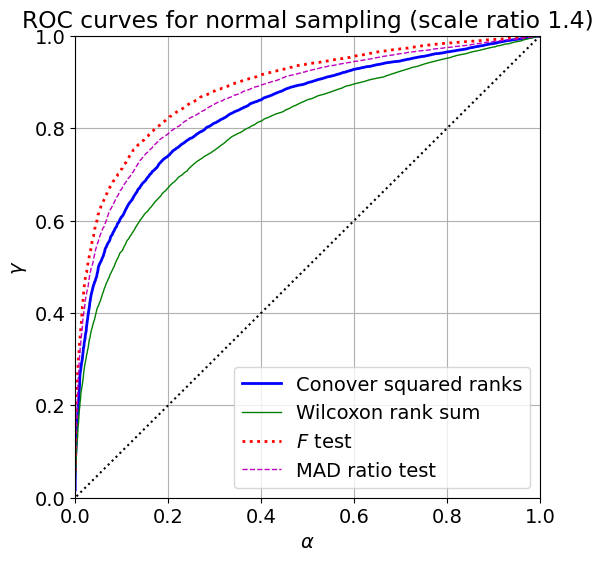

In [7]:
plt.figure(figsize=(6,6));
plt.plot(alphac_c,gammac_c,'b-',lw=2,label='Conover squared ranks');
plt.plot(alphaw_c,gammaw_c,'g-',lw=1,label='Wilcoxon rank sum');
plt.plot(alphaf_c,gammaf_c,'r:',lw=2,label='$F$ test');
plt.plot(alphaa_c,gammaa_c,'m--',lw=1,label='MAD ratio test');
plt.plot(alphac_c,alphac_c,'k:');
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$\gamma$');
plt.title('ROC curves for normal sampling (scale ratio 1.4)');
plt.legend(loc='lower right');
plt.xlim(0,1);
plt.ylim(0,1);
plt.grid(True);

**COMMENT** on the relative power of these searches, in particular the performance of the $F$ test relative to the rest, and of the Conover test relative to the Wilcoxon rank sum test on the absolute deviations.  Are these relationships consistent with your expectations?

All of the distributions perform well above the baseline diagonal. The $F$ test performs the best, slightly above the MAD ratio test. The Conover test performs better than the Wilcoxon rank sum test. This is consistent with my expectations because the $F$ test is known to be optimal for normally distributed data. The Conover test, by using squared ranks, gives more weight to larger differences in the absolute deviations, making it more sensitive to variance differences than the Wilcoxon test, which only considers the ranks without squaring.

**(b)** Laplace (double exponential) Sampling Distribution

Now consider the case where the sampling distributions are  Laplace (double exponential).  We use the same location parameters as before, and a scale parameter of $1/\sqrt{2}$ as defined by `scipy.stats` (which corresponds to a population variance of $1$) for the null samples.  For the alternative sample, we scale up the values in the $\{y_i\}$ sample by a factor of $1.4$ as before.

Repeat the steps of part (a) to produce a comparison among the ROC curves for the four tests using these samples.

In [8]:
Nmonte = 10**4
n = 45
m = 45
N = m+n
np.random.seed(20250306)
x_Ii = stats.laplace(scale=np.sqrt(0.5),loc=5).rvs(size=(Nmonte,n))
y0_Ij = stats.laplace(scale=np.sqrt(0.5)).rvs(size=(Nmonte,m))
y1_Ij = y0_Ij * 1.4
xbar_I = np.mean(x_Ii,axis=-1)
ybar0_I = np.mean(y0_Ij,axis=-1)
ybar1_I = np.mean(y1_Ij,axis=-1)

In [9]:
U_Ii = np.abs(x_Ii - xbar_I[:,None])
V0_Ij = np.abs(y0_Ij - ybar0_I[:,None])
V1_Ij = np.abs(y1_Ij - ybar1_I[:,None])
UVcombo0_Ik = np.concatenate((U_Ii,V0_Ij),axis=-1)
UVcombo1_Ik = np.concatenate((U_Ii,V1_Ij),axis=-1)
xflags_k = np.concatenate(([True,]*n,[False,]*m))
yflags_k = np.bitwise_not(xflags_k)
UVranks0_Ik = stats.mstats.rankdata(UVcombo0_Ik,axis=-1)
UVranks1_Ik = stats.mstats.rankdata(UVcombo1_Ik,axis=-1)
Uranks0_Ik = UVranks0_Ik*xflags_k[None,:]
Uranks1_Ik = UVranks1_Ik*xflags_k[None,:]
Vranks0_Ik = UVranks0_Ik*yflags_k[None,:]
Vranks1_Ik = UVranks1_Ik*yflags_k[None,:]

In [10]:
Txc0_I = np.sum(Uranks0_Ik**2,axis=-1)
Txc1_I = np.sum(Uranks1_Ik**2,axis=-1)
Tyc0_I = np.sum(Vranks0_Ik**2,axis=-1)
Tyc1_I = np.sum(Vranks1_Ik**2,axis=-1)
Txw0_I = np.sum(Uranks0_Ik,axis=-1)
Txw1_I = np.sum(Uranks1_Ik,axis=-1)
Tyw0_I = np.sum(Vranks0_Ik,axis=-1)
Tyw1_I = np.sum(Vranks1_Ik,axis=-1)
Txf_I = np.sum(U_Ii**2,axis=-1)
Tyf0_I = np.sum(V0_Ij**2,axis=-1)
Tyf1_I = np.sum(V1_Ij**2,axis=-1)
Txa_I = np.sum(U_Ii,axis=-1)
Tya0_I = np.sum(V0_Ij,axis=-1)
Tya1_I = np.sum(V1_Ij,axis=-1)

In [11]:
Tc0_I = np.abs(np.log(Txc0_I/Tyc0_I))
Tc1_I = np.abs(np.log(Txc1_I/Tyc1_I))
cc_c = np.linspace(0,np.max(Tc0_I),1000)
alphac_c = np.mean((Tc0_I[None,:] > cc_c[:,None]),axis=-1)
gammac_c = np.mean((Tc1_I[None,:] > cc_c[:,None]),axis=-1)
Tw0_I = np.abs(np.log(Txw0_I/Tyw0_I))
Tw1_I = np.abs(np.log(Txw1_I/Tyw1_I))
cw_c = np.linspace(0,np.max(Tw0_I),1000)
alphaw_c = np.mean((Tw0_I[None,:] > cw_c[:,None]),axis=-1)
gammaw_c = np.mean((Tw1_I[None,:] > cw_c[:,None]),axis=-1)
Tf0_I = np.abs(np.log(Txf_I/Tyf0_I))
Tf1_I = np.abs(np.log(Txf_I/Tyf1_I))
cf_c = np.linspace(0,np.max(Tf0_I),1000)
alphaf_c = np.mean((Tf0_I[None,:] > cf_c[:,None]),axis=-1)
gammaf_c = np.mean((Tf1_I[None,:] > cf_c[:,None]),axis=-1)
Ta0_I = np.abs(np.log(Txa_I/Tya0_I))
Ta1_I = np.abs(np.log(Txa_I/Tya1_I))
ca_c = np.linspace(0,np.max(Ta0_I),1000)
alphaa_c = np.mean((Ta0_I[None,:] > ca_c[:,None]),axis=-1)
gammaa_c = np.mean((Ta1_I[None,:] > ca_c[:,None]),axis=-1)

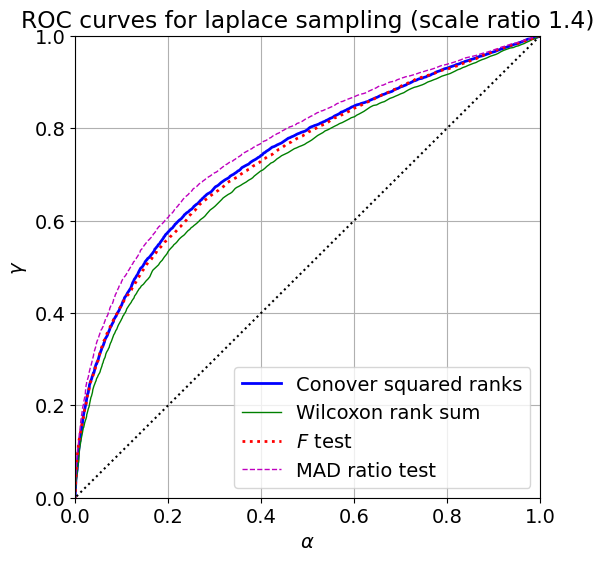

In [12]:
plt.figure(figsize=(6,6));
plt.plot(alphac_c,gammac_c,'b-',lw=2,label='Conover squared ranks');
plt.plot(alphaw_c,gammaw_c,'g-',lw=1,label='Wilcoxon rank sum');
plt.plot(alphaf_c,gammaf_c,'r:',lw=2,label='$F$ test');
plt.plot(alphaa_c,gammaa_c,'m--',lw=1,label='MAD ratio test');
plt.plot(alphac_c,alphac_c,'k:');
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$\gamma$');
plt.title('ROC curves for laplace sampling (scale ratio 1.4)');
plt.legend(loc='lower right');
plt.xlim(0,1);
plt.ylim(0,1);
plt.grid(True);

**COMMENT** on the relative power of the four tests.  Which is most powerful?  How does the Conover squared-ranks test compare to the Wilcoxon rank-sum test on the absolute deviations?  Is this consistent with your expectations?

Now they all move slightly closer to the diagonal baseline. Now the MAD ratio test performs the best. The $F$ test is now the third best. The Conover test is still better than the Wilcoxon rank sum test but now beats the $F$ test as well. The $F$ test's reduced performance is expected because it's optimized for normally distributed data and uses squared deviations, which amplify the impact of outliers that are more common in heavy-tailed distributions like Laplace. The Conover squared-ranks test continues to outperform the Wilcoxon rank-sum test, which is expected since the squaring of ranks in Conover's test gives more weight to larger differences in scale.